# Explanatory Data Analysis (EDA) of the data

In [1]:
import os
from langchain_community.document_loaders import TextLoader


processed_data_dir = "../data/processed"

no_pages = 0
no_characters = []

for root, _, files in os.walk(processed_data_dir):
    for file in files:
        if file.endswith(".txt"):
            input_path = os.path.join(root, file)

            loader = TextLoader(input_path)
            document = loader.load()
            assert len(document) == 1
            no_pages += 1
            no_characters.append(len(document[0].page_content))

print(f"Number of pages: {no_pages}")

Number of pages: 700


In [3]:
import numpy as np

print("Mean: ", np.mean(no_characters))
print("Median: ", np.median(no_characters))
print("Max: ", np.max(no_characters))
print("Min: ", np.min(no_characters))
print("Std: ", np.std(no_characters))

print("Quantiles: ", np.percentile(no_characters, [25, 50, 75, 90, 95, 99]))

Mean:  6447.557142857143
Median:  1964.0
Max:  753672
Min:  8
Std:  41104.18932320845
Quantiles:  [  516.25  1964.    4209.    7280.2  12721.7  63859.76]


As we can see there are also pages which are really long and have many characters.

Let's see the histogram

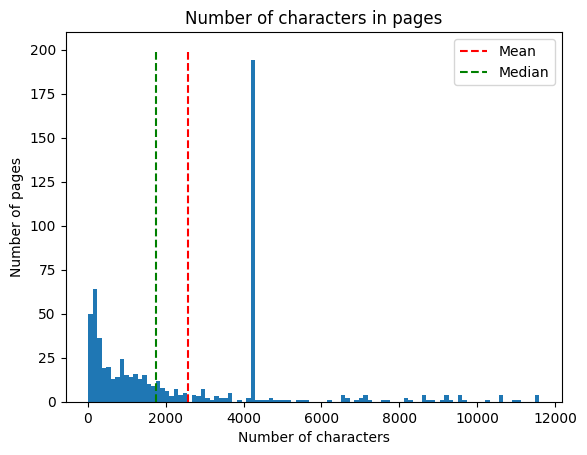

In [ ]:
import matplotlib.pyplot as plt

no_characters = np.array(no_characters)
chars = no_characters[no_characters < 12000]  # filter out 'outliers' > 0.95 quantile

plt.hist(chars, bins=100)
plt.title("Number of characters in pages")
plt.xlabel("Number of characters")
plt.vlines(np.mean(chars), 0, 200, color="r", label="Mean", linestyles="dashed")
plt.vlines(np.median(chars), 0, 200, color="g", label="Median", linestyles="dashed")
plt.legend()
plt.ylabel("Number of pages")
plt.show()

Quite suprisingly we have a peak of documents with around 4250 characters.